In [1]:
from closure_funcs import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from scipy.stats import linregress
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import math

In [2]:
d = pd.read_csv('../tables/merged_final_non_org.csv', parse_dates=['Time_Mid'])
#data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])

In [3]:
#d = d[(d['Org_Ave_IsoK_STP']>=0) & (d['SO4_Ave_IsoK_STP']>=0) & (d['NO3_Ave_IsoK_STP']>=0) & (d['NH4_Ave_IsoK_STP']>=0) & (d['Chl_Ave_IsoK_STP']>=0)]

In [4]:
'''
ams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']
for i in range(0,5):
    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0
d['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)
'''

"\nams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']\nfor i in range(0,5):\n    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0\nd['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)\n"

In [5]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

<Figure size 1000x600 with 0 Axes>

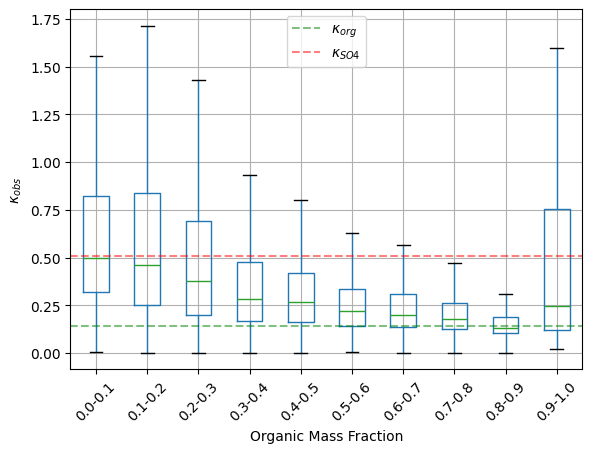

In [6]:
# Assuming 'd' is your DataFrame containing 'CO_ppm' and 'k_obs' columns
# Define CO_ppm ranges (bins) - adjust as needed
#d_sub = sub_m2[sub_m2['CCN_SS']==0.37]
d_sub = d
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
plt.show()
# Bin 'CO_ppm' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Plot boxplot of 'k_obs' for each CO_ppm range
plt.figure(figsize=(10, 6))
d_sub.boxplot(column='k_obs', by='OMF_range', grid=True, showfliers=False)
plt.title('')
plt.axhline(.14, c='green', ls='--', alpha=.5, label=r'$\kappa _{org}$')
plt.axhline(.507, c='red', ls='--', alpha=.5, label=r'$\kappa _{SO4}$')
plt.legend()
plt.suptitle('')  # Removes the automatic boxplot subtitle
plt.xlabel('Organic Mass Fraction')
plt.ylabel(r'$\kappa _{obs}$')
plt.xticks(rotation=45)
#plt.ylim([0, 0.15])
plt.savefig('../figures/k_obs_v_OMF.png', dpi=300, bbox_inches='tight')
plt.show()

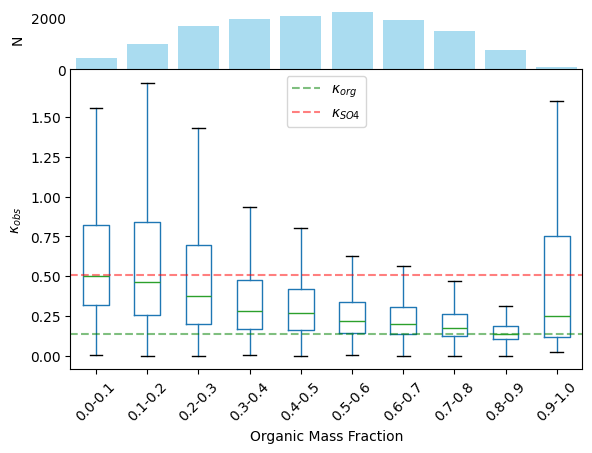

In [7]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.14, color='green', linestyle='--', alpha=0.5, label=r'$\kappa _{org}$')
ax[1].axhline(.507, color='red', linestyle='--', alpha=0.5, label=r'$\kappa _{SO4}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
rem_k = ['Takeoff/Landing', 'Transit', 'Descent', 'Ascent', 'Other', 'Slant/Spiral', 'Remote Sensing (HSRL-2)']

In [9]:
for i in range(0,len(rem_k)):
    d.loc[d['leg']==rem_k[i], 'leg'] = np.nan

In [10]:
df_winter = d[d['Time_Mid'].dt.month.isin([11, 12, 1, 2, 3, 4])]
df_spring = d[d['Time_Mid'].dt.month.isin([5, 6]) & (np.logical_not((d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022]))))]
df_summer = d[d['Time_Mid'].dt.month.isin([8, 9])]
df_bermuda = d[(d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022]))]

In [11]:
d_seg = [df_winter, df_spring, df_summer, df_bermuda]

In [12]:
count = 0
for i in range(0,len(d_seg)):
    count += len(d_seg[i])

In [13]:
df_winter['leg'].unique()

array([nan, 'BCB', 'ACB', 'MinAlt', 'ACT', 'BCT', 'ABL', 'BBL'],
      dtype=object)

In [14]:
for i in range(0,4):
    d_seg[i]

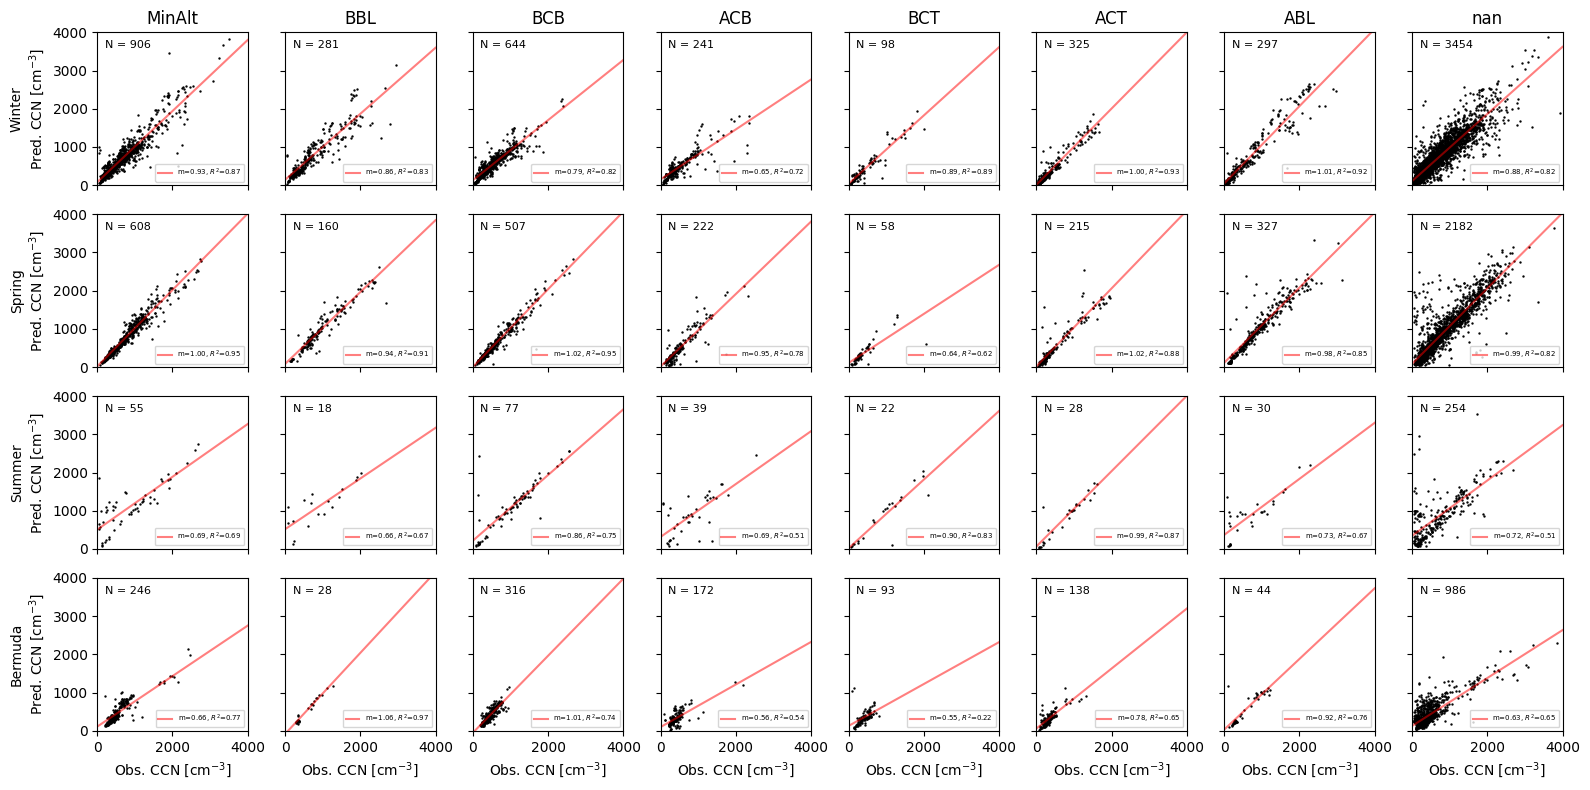

In [15]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.05, 0.95, f"N = {num_points}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0,0].set_xlim([0,4000])
axes[0,0].set_ylim([0,4000])

season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    
plt.tight_layout()
plt.savefig('../figures/season_legs.png', dpi=300)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_94869/2709098911.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_94869/2709098911.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_94869/2709098911.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

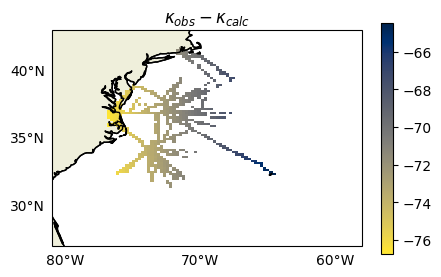

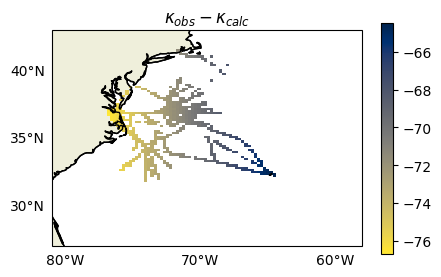

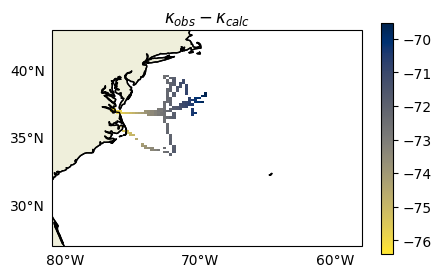

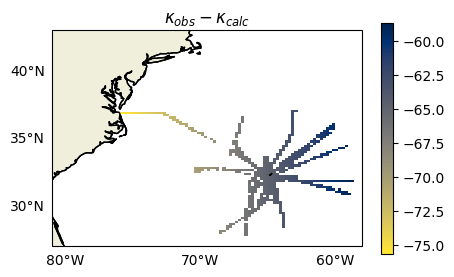

In [16]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''
for d_1 in d_seg:

    # Set up the map projection and plot area
    fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

    plt_key = ['Longitude', 'k', 'CO_ppm']
    cmap_labels = [r'$\kappa _{obs} - \kappa _{calc}$', r'$\kappa _{calc}$', 'CO [ppm]']

    i=0
    data = d_1.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


    #ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

    # Set title
    #ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

    # Show the plot
    #plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)